In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# read in data
df = pd.read_csv('iris.csv')

In [3]:
# quick preview dataset
df.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [4]:
#Concise summary of a DataFrame including num of cols, null counts, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
#Generates descriptive statistics that summarize the central tendency,
#dispersion and shape of a dataset’s distribution, excluding NaN values
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


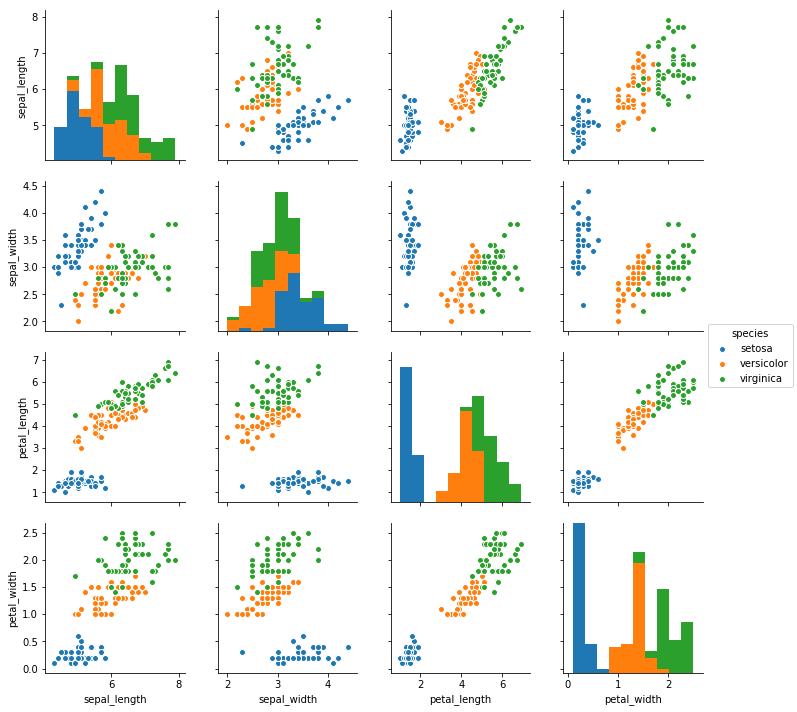

In [6]:
# view the relationships between variables; color code by species type
sns.pairplot(df, hue="species");

In [7]:
# Perform Simple Random Sampling with replacement
# split data into training and test sets; set random state to 0 for reproducibility 
x_train, x_test, y_train, y_test = train_test_split(df[['sepal_length', 'sepal_width', 
                                                        'petal_length', 'petal_width']],
                                                    df['species'], random_state = 0)

# X is the independent variables
# y is the dependent variable (classlabel/target)

print('x_train\n', x_train, end='\n')
print('y_train\n', y_train, end='\n')
print('x_test\n', x_test, end='\n')
print('Y_test\n', y_test, end='\n')

x_train
      sepal_length  sepal_width  petal_length  petal_width
61            5.9          3.0           4.2          1.5
92            5.8          2.6           4.0          1.2
112           6.8          3.0           5.5          2.1
2             4.7          3.2           1.3          0.2
141           6.9          3.1           5.1          2.3
43            5.0          3.5           1.6          0.6
10            5.4          3.7           1.5          0.2
60            5.0          2.0           3.5          1.0
116           6.5          3.0           5.5          1.8
144           6.7          3.3           5.7          2.5
119           6.0          2.2           5.0          1.5
108           6.7          2.5           5.8          1.8
69            5.6          2.5           3.9          1.1
135           7.7          3.0           6.1          2.3
56            6.3          3.3           4.7          1.6
80            5.5          2.4           3.8          1.1
123  

In [8]:
# see how data has been split
print("x_train shape: {}\ny_train shape: {}".format(x_train.shape, y_train.shape))
print("x_test shape: {}\ny_test shape: {}".format(x_test.shape, y_test.shape))

x_train shape: (112, 4)
y_train shape: (112,)
x_test shape: (38, 4)
y_test shape: (38,)


In [9]:
# initialize the Estimator object
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')

In [10]:
# fit the model to training set in order to predict classes
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [11]:
# create a prediction array for our test set
y_pred = knn.predict(x_test)

In [12]:
# based on the training dataset, our model predicts the following for the test set:
pd.concat([x_test, y_test, pd.Series(y_pred, name='Predicted', index=x_test.index)], 
          ignore_index=False, axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species,Predicted
114,5.8,2.8,5.1,2.4,virginica,virginica
62,6.0,2.2,4.0,1.0,versicolor,versicolor
33,5.5,4.2,1.4,0.2,setosa,setosa
107,7.3,2.9,6.3,1.8,virginica,virginica
7,5.0,3.4,1.5,0.2,setosa,setosa
100,6.3,3.3,6.0,2.5,virginica,virginica
40,5.0,3.5,1.3,0.3,setosa,setosa
86,6.7,3.1,4.7,1.5,versicolor,versicolor
76,6.8,2.8,4.8,1.4,versicolor,versicolor
71,6.1,2.8,4.0,1.3,versicolor,versicolor


In [13]:
# what is our prediction score?
print('Accuracy rate: ', metrics.accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy rate:  0.9736842105263158
Confusion matrix:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      0.94      0.97        16
  virginica       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38



In [14]:
# experimenting with different n values
k_range = list(range(1,50))
scores_train = []
scores_test = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train, y_train)
    x_pred = knn.predict(x_train)
    scores_train.append(metrics.accuracy_score(y_train, x_pred))

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores_test.append(metrics.accuracy_score(y_test, y_pred))
    

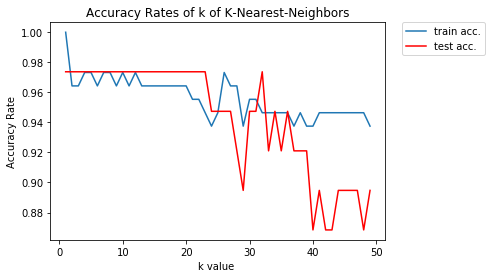

<Figure size 432x288 with 0 Axes>

In [15]:
#Plot accuracy of train vs test#
plt.plot(k_range, scores_train, label = "train acc.")
plt.plot(k_range, scores_test, 'r', label= "test acc.")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('k value ')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rates of k of K-Nearest-Neighbors')
plt.show()
plt.savefig('KNN_trainVStest' + '.png', dpi=900)

In [16]:
# compare with regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy rate: ', metrics.accuracy_score(y_test, y_pred))


Accuracy rate:  0.868421052631579


We get 0.86, which doesn't work very well, due to the fact that the logistic can deal with discrete value.

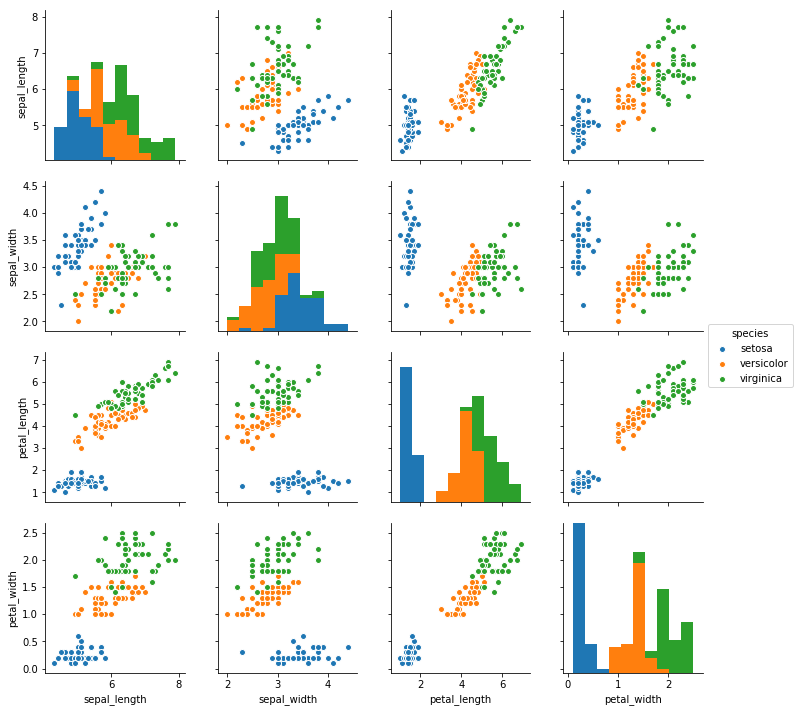

In [17]:
# We can try to predict petal_legnth using linear regression model

iris = sns.load_dataset("iris")
iris.head()
# Quick plot of the data using seaborn again
sns.pairplot(iris, hue="species")



Which observation point should be fit to linear line?

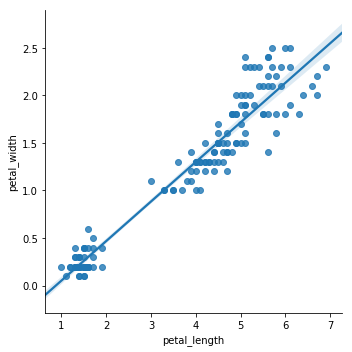

In [18]:
sns.lmplot(x="petal_length", y="petal_width", data=iris)
# We can see a pretty strong linear relationship between petal_length and petal_width. Let's fit a linear regression.

In [19]:
from sklearn import linear_model

X = iris[["petal_length"]]
y = iris["petal_width"]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)



-0.3630755213190291 [0.41575542]


this means that the best fit line is
for y = a+bx
a = -0.3630755213190291 and b = 0.41575542

In [20]:
import statsmodels.api as sm

# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     4417.
Date:                Wed, 19 Sep 2018   Prob (F-statistic):          1.22e-112
Time:                        23:20:48   Log-Likelihood:                -8.7179
No. Observations:                 150   AIC:                             19.44
Df Residuals:                     149   BIC:                             22.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
petal_length     0.3365      0.005     66.463   


 this means that the best fit line is:\n
 for y = a+bx \n
 a = -0.3630755213190291 and b = 0.41575542\n
